# Importing the classifier pickle
NOTE: pickle must contain the trained __classifier__, not just the model.

In [1]:
import os
import math
import pickle
import numpy as np
import statistics as stats

from sklearn import tree
from pandas import DataFrame
from matplotlib import pyplot as plt

# --- fill these in to specify which pickle should be opened ---
byte_count = 16
file = "dtc-head-16-cdiac_multilabel_gt_copy.csv-2022-03-18-08.36.50.pkl"
classifier_name = file.split("-")[0]
# --------------------------------------------------------------

os.chdir('../XtractPredictor/')
classifier = pickle.load(open(f"stored_models/trained_classifiers/{classifier_name}/{file}", "rb"))
os.chdir('../xtract-research-notebooks/')

### Decision tree visualization
Acceptable classifiers:
- Decision tree classifier (dtc)
- Single-tree extra tree classifier (t_etc)

NOTE: If decision tree has too high of a maximum depth, this visualization will be illegible. I recommend setting max_depth to 3.

Text(0.13, 0.7, 'netcdf\nkeyword\nempty\nexecutable\npython\ntabular\ncompressed\njsonxml\nimages\nc-code')

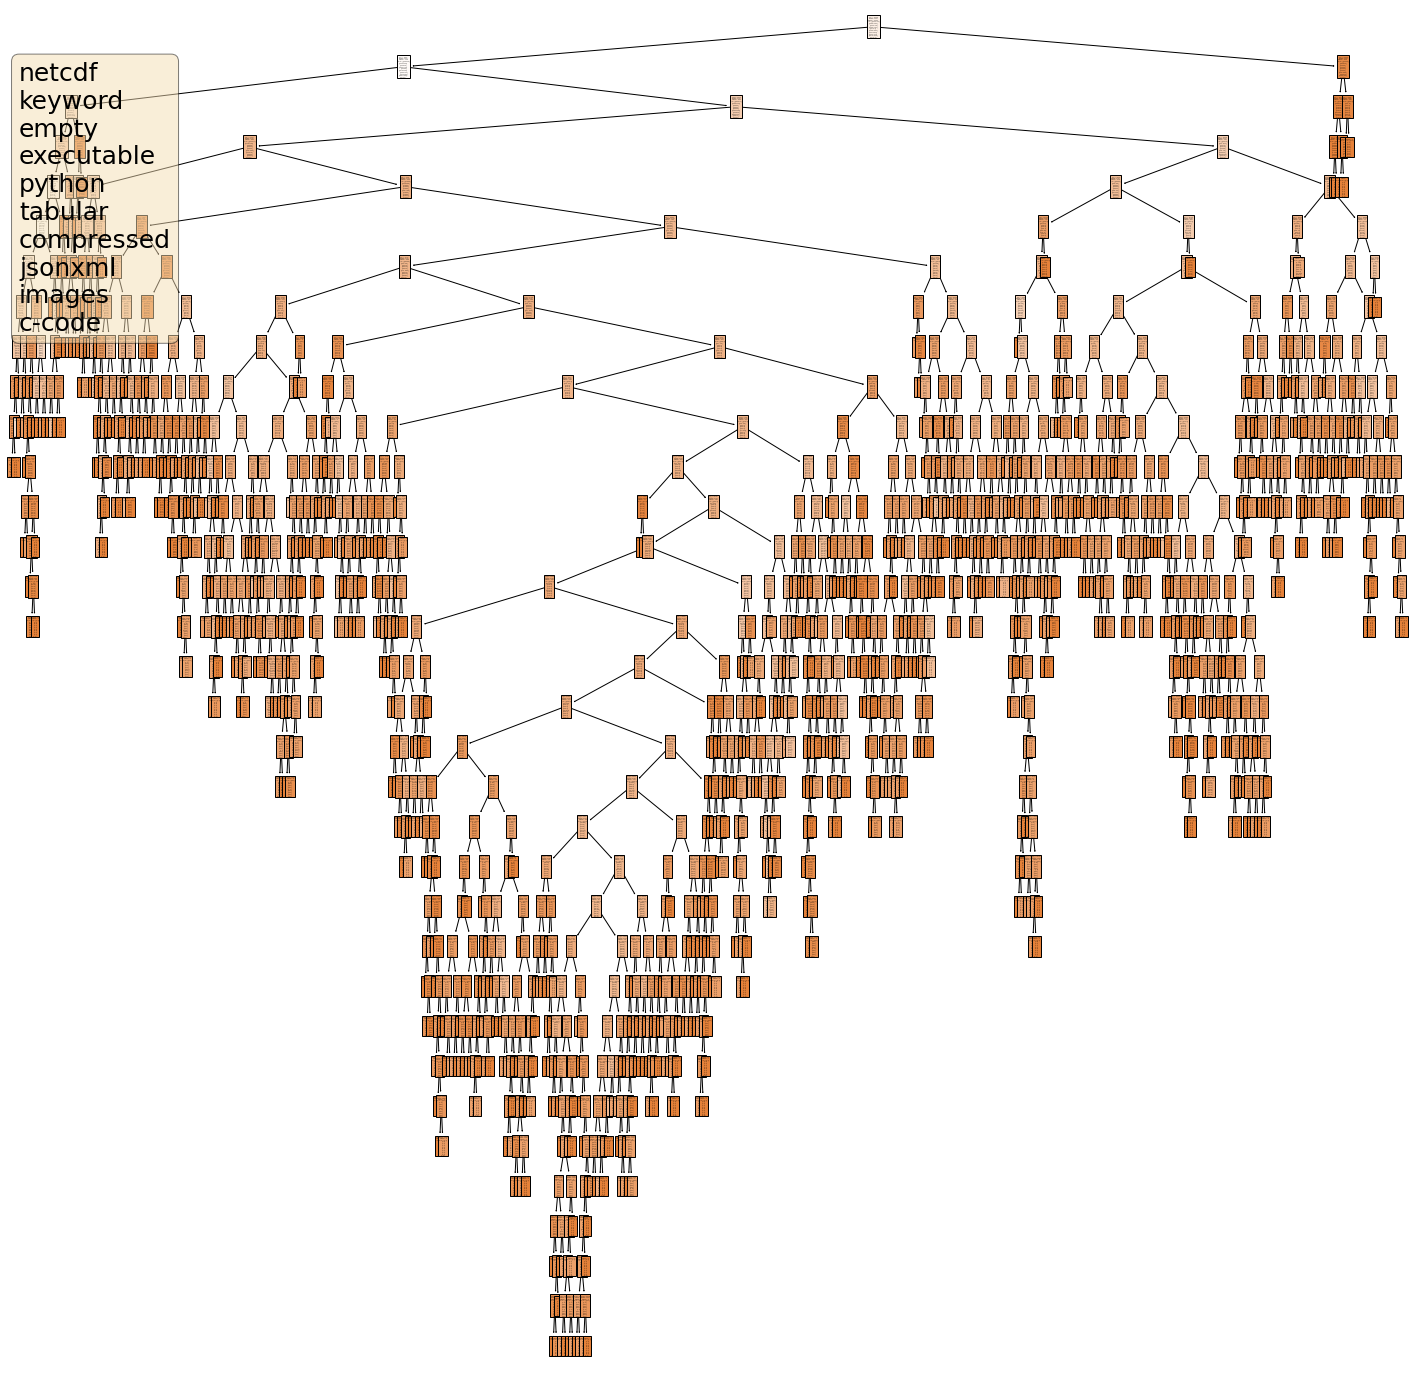

In [2]:
fig = plt.figure(figsize=(25, 25))
_ = tree.plot_tree(classifier.model,
                   filled=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
label_legend = ""
for label in classifier.unique_labels:
    label_legend += (label + "\n")
fig.text(0.13, 0.7, label_legend[:-1], fontsize=25, bbox=props)

## Byte heatmap visualization
*Acceptable classifiers: any*

In [17]:
y_pred = classifier.model.predict(classifier.X_test)

# Building a dictionary of the predicted (multi)labels and their corresponding binary lists

unique_rows = np.unique(y_pred, axis=0)
unique_dict = {}
for unique_row in unique_rows:
    labels = []
    for pair in zip(unique_row, classifier.unique_labels):
        if pair[0]:
            labels.append(pair[1])
    unique_dict[", ".join(labels)] = unique_row
    
# Building a dictionary of all the feature info for each predicted label

large_dict = {}
for key in unique_dict.keys():
    large_dict[key] = []

for i in range(len(classifier.X_test)):
    for key in unique_dict.keys():
        if np.all(y_pred[i]==unique_dict[key]):
            large_dict[key].append(classifier.X_test[i].tolist())
            break

sample_counts = "Predicted sample counts\n\n"
for key in large_dict.keys():
    if key == '':
        sample_counts += "NO LABEL : " + str(len(large_dict[key])) + "\n"
    else:
        sample_counts += key + " : " + str(len(large_dict[key])) + "\n"

print("The labels and their binarized lists:")
for key in unique_dict.keys():
    print(key)
    print(unique_dict[key])

The labels and their binarized lists:

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
images
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
compressed
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
tabular
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
executable
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
empty
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
keyword
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
keyword, jsonxml
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
keyword, tabular
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
keyword, python
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
netcdf
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
netcdf, keyword
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Average value heatmap

Text(16, -0.25, 'Predicted sample counts\n\nNO LABEL : 1\nimages : 3088\ncompressed : 22859\ntabular : 5716\nexecutable : 3305\nempty : 132\nkeyword : 2578\nkeyword, jsonxml : 779\nkeyword, tabular : 3132\nkeyword, python : 2\nnetcdf : 52\nnetcdf, keyword : 41')

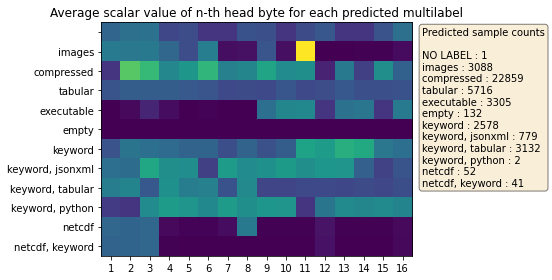

In [18]:
# Averaging the features for each bit

avgs = []
for key in large_dict.keys():
    lst = large_dict[key]
    lst = [list(x) for x in zip(*lst)]
    lst = [stats.mean(x) for x in lst]
    avgs.append(lst)
    
# UNCOMMENT to fill in empty labels in case you run on a limited range of samples

# for i in range(len(avgs)):
#     if (len(avgs[i])==0):
#         avgs[i] = [0.0] * byte_count

# Creating the plot

fig, ax1 = plt.subplots()

# Label y axis side with the class name

y1_axis_labels = large_dict.keys()
ax1.set_yticks(np.arange(len(y1_axis_labels)), labels=y1_axis_labels)

# Plot the heatmap set good x-axis ticks

plt.imshow(np.array(avgs))
plt.xticks(ticks=[i for i in range(byte_count)], labels=[i+1 for i in range(byte_count)])

# Adding title and sample count legend

ax1.set_title("Average scalar value of n-th head byte for each predicted multilabel")
plt.tight_layout()

plt.text(byte_count, -0.25, sample_counts[:-1], fontsize=10,
         verticalalignment='top', bbox=props)

In [11]:
print(large_dict.keys())

dict_keys(['', 'images', 'compressed', 'tabular', 'executable', 'empty', 'keyword', 'keyword, jsonxml', 'keyword, tabular', 'keyword, python', 'netcdf', 'netcdf, keyword'])


### Standard deviation value heatmap

In [ ]:
# Finding the standard deviation for each bit

stdevs = []
y_axis_labels = []
for key in large_dict.keys():
    lst = large_dict[key]
    lst = [list(x) for x in zip(*lst)]
    if (len(lst[0])>1):
        lst = [stats.stdev(x) for x in lst]
        stdevs.append(lst)
        y_axis_labels.append(key)
    
# UNCOMMENT to fill in empty labels in case you run on a limited range of samples

# for i in range(len(stdevs)):
#     if (len(stdevs[i])==0):
#         stdevs[i] = [0.0] * byte_count

# Creating the plot

fig, ax = plt.subplots()
im = ax.imshow(np.array(stdevs))

# Show all ticks and label them with the respective list entries

ax.set_yticks(np.arange(len(y_axis_labels)), labels=y_axis_labels)

# Plot the heatmap set good x-axis ticks

plt.imshow(np.array(stdevs))
plt.xticks(ticks=[i for i in range(byte_count)], labels=[i+1 for i in range(byte_count)])

# Adding title and sample count legend

ax1.set_title("Standard deviation of scalar values of n-th head byte")
plt.tight_layout()

plt.text(byte_count, -0.25, sample_counts[:-1], fontsize=10,
         verticalalignment='top', bbox=props)